In [10]:
from DataLoader import RedWebDataset , Rescale , RandomCrop , ToTensor
from __future__ import print_function, division
import os
import torch
from skimage import io, transform
import random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [11]:
# from my utils notebook
def add_to_class(Class):
    """Register them functions"""
    def wrapper(obj):
        # setattr(object, name, value) -> sets the value of the attribute
        setattr(Class ,obj.__name__ , obj)
    return wrapper

In [12]:
class OnlineRedWeb(RedWebDataset):
    def __init__(self, root_dir ,transform=None,N:int=0,sigma:int=0.02):
        super().__init__(root_dir,transform)
        self.N =N
        self.sigma = sigma

    def __getitem__(self, index):
        # Call the __getitem__ method of the original dataset
        original_item = super(OnlineRedWeb, self).__getitem__(index)

        # Extract necessary information from the original_item
        mono = original_item['mono']
        heat = original_item['heat']
        
        if self.N != 0:
            # Implement online sampling logic here
            _ ,height, width = heat.shape
            point_a =[]
            point_b =[]
            labels = []
            for _ in range(self.N):
                i, j = random.randint(0, height-1), random.randint(0, width-1)
                k,l = random.randint(0, height-1), random.randint(0, width-1)

                ga, gb = heat[i, j], heat[k, l]  # Assuming heat is a 2D tensor

                if ga/ gb > 1 + self.sigma:
                    label = 1
                elif ga/ gb < 1 - self.sigma:
                    label = -1
                else:
                    label = 0

                point_a.append((i,j))
                point_b.append((k,l))
                labels.append(label)

            # Update the original_item or create a new dictionary to return
            online_item = {'mono': mono,
                           'heat': heat,
                           'point_a':torch.tensor(point_a),"point_b": torch.tensor(point_b),
                           'labels': torch.tensor(labels)}
        else:
            online_item = {"mono":mono , "heat":heat}

        return online_item

In [13]:
@add_to_class(OnlineRedWeb)
def online_collater(batch):
    mono = torch.stack([item['mono'] for item in batch])
    heat = torch.stack([item['heat'] for item in batch])
    point_a = [item['point_a'] for item in batch]
    point_b = [item['point_b'] for item in batch]
    labels = [item['labels'] for item in batch]
    return{'mono': mono, 'heat': heat,
           'point_a':point_a ,"point_b":point_b,
           'labels': labels}


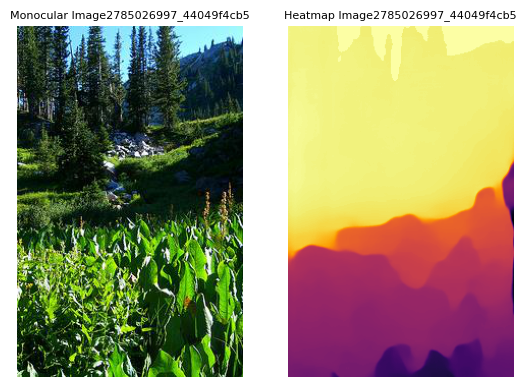

In [14]:
# we can still call the old methods on this class
loader = OnlineRedWeb(root_dir="../ReDWeb_V1")
loader._show_sample()

In [15]:
online_dataset = OnlineRedWeb(root_dir="../ReDWeb_V1",transform=transforms.Compose([
    Rescale(256),
    RandomCrop(225),
    ToTensor()
]))

In [16]:
online_loader = DataLoader(online_dataset,batch_size=32,shuffle=True,collate_fn=online_collater)

In [17]:
# you can turn off online sampling with N=0
normal_dataset = OnlineRedWeb(root_dir="../ReDWeb_V1",transform=transforms.Compose([
    Rescale(256),
    RandomCrop(225),
    ToTensor()
]) , N=0) 
normal_loader = DataLoader(online_dataset,batch_size=32,shuffle=True) # no coallate_fn

In [20]:
for i, batch in enumerate(normal_loader):
    if i > 0 :
        break
    print(batch["heat"].shape)
    # print(batch["heat"].shape)

(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
torch.Size([32, 3, 225, 225])
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225, 225, 3)
(225, 225, 3) (225